# Measuring Development of countries over 20 years
# Exploring Socioeconomic Indicators and Urbanization Rates Across Nations

# CODE 1161 DATA PROJECT
# Z5340777



# I wanted to understand how countries have progressed in these three important aspects: incomeperperson, internetuserate and urbanrate


# Important note

# Income per person (gdp per capita): calucated in usd dollars and has not been adjusted for inflation

# Internetuserate: internet users (per 100 people) people with access to the internet

# Urbanrate: The amount of people living in urban areas and its devoplment over time



# Sources
Comparing two datasets

For year 2000 dataset
https://www.kaggle.com/datasets/sansuthi/gapminder-internet

2020 dataset
urban rate: https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS
income: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
internet: https://data.worldbank.org/indicator/IT.NET.USER.ZS


`imports`, you've seen this before!

In [60]:
# Import the 'matplotlib' library for data visualization
import matplotlib
# Import the 'pyplot' submodule from 'matplotlib' for creating plots
import matplotlib.pyplot as plt
# Import the 'numpy' library for numerical computations
import numpy as np
# Import the 'pandas' library for data manipulation and analysis
import pandas as pd
# Import the 'os' module for interacting with the operating system
import os
# Import the 'datetime' class from the 'datetime' module for working with dates and times
from datetime import datetime
# Import the 'seaborn' library for enhanced data visualization
import seaborn as sns
# Import the 'pandas' library again (duplicate import, can be removed)
import pandas as pd
# Import the 'graph_objects' submodule from 'plotly' for creating interactive visualizations
import plotly.graph_objects as go
# Import the 'display' function from 'IPython.display' for displaying objects in IPython environments
from IPython.display import display


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [61]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [62]:
plt.rcParams["figure.figsize"] = (10, 5)


In [63]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [64]:

data2 = pd.read_csv("gapminder_internet.csv")
data1 = pd.read_csv("2020dataset.csv")

print("done")

done


# Lets look at the dataset

In [65]:
data1.head(21)

,country,incomeperperson,internetuserate,urbanrate,continent
0,Afghanistan,516.87,18.40,26.026,Asia
1,Albania,5343.04,72.24,62.112,Europe
2,Algeria,3354.16,63.95,73.733,Africa
3,Andorra,37207.22,93.21,87.916,Europe
4,Angola,1502.95,32.55,66.825,Africa
5,Antigua and Barbuda,15284.77,95.69,24.433,North America
6,Argentina,8496.43,85.51,92.111,South America
7,Armenia,4505.87,76.51,63.313,Asia
8,Aruba,24487.86,NaN,43.697,South America
9,Australia,51722.07,96.39,86.241,Oceania


# The missing information for these places in the list can be attributed to various factors, such as data availability, data collection methodologies, political situations, and economic conditions. 


**Asia:**
- Afghanistan: Ongoing conflict and political instability.
- Korea, Dem. Rep. (North Korea): Isolation and lack of transparency.
- Myanmar: Political unrest and limited access to certain areas.

**South America:**
- Aruba: Data unavailability or inaccessibility.

**North America:**
- Cayman Islands, Guadeloupe, Martinique, Netherlands Antilles: Smaller territories with lower data collection priority.
- Saint Vincent and the Grenadines: Limited resources and data infributing to its data gaps.



**Oceania:**
- Cook Islands, French Polynesia, Guam, Nauru, New Caledonia, Niue: Remote or small territories with data collection challenges.
- Marshall Islands, Palau, Tuvalu: Remote locations and limited resources.

**Europe:**
- Faeroe Islands: Small population and limited resources.
- Gibraltar: Political status and sovereignty issues.

**Africa:**
- Reunion: Remote location or data prioritization challenges.
- Sao Tome and Principe, Somalia, Sudan: Political instability and conflict.
- Sierra Leone: Limited resources and data infrastructure.

Maps of all countries with values year 2000

In [90]:

df = pd.read_csv('gapminder_internet.csv')

# Import necessary libraries for creating the choropleth map
import plotly.graph_objects as go

# Define a function to create a choropleth map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Create a Choropleth trace for the map
    trace = go.Choropleth(
        locations=df['country'],              # List of country names for map locations
        locationmode='country names',           # Specify location mode as country names
        z=z_data,                               # Data values for colouring the map
        text=df['country'],                   # Text to display on hover over map
        hovertemplate="<b>%{text}</b><br><br>" + title + ": $%{z:,.2f}<extra></extra>",  # Hover template for tooltip
        colorscale=colorscale,                  # Colour scale for mapping values to colours
        reversescale=reversescale,              # Reverse the colour scale if True (for income data)
        colorbar=dict(title=colorbar_title),    # Title for the colour bar
        marker_line_color='darkgray',           # Colour of the border lines for map markers
        marker_line_width=0.5                   # Width of the border lines for map markers
    )

    # Add the Choropleth trace to the figure
    fig.add_trace(trace)

    # Update geographical layout settings
    fig.update_geos(
        visible=False,                          # Set map visibility to False initially
        showcountries=True,                     # Show country boundaries
        showcoastlines=True,                    # Show coastlines
        projection_type="mercator"              # Use Mercator projection for the map
    )

    # Update overall layout settings
    fig.update_layout(
        title=title,                            # Set the title of the map
        geo=dict(
            showframe=False,                     # Hide map frame
            showcoastlines=True,                 # Show coastlines
            projection_type="mercator"           # Use Mercator projection for the map
        ),
        annotations=[
            dict(
                x=0.5,
                y=-0.1,
                xref='paper',
                yref='paper',
                text='Search a country:',         # Annotation for searching a country
                showarrow=False,
                font=dict(size=14)
            )
        ],
        margin=dict(l=0, r=0, t=30, b=0),         # Adjust margins for the map
        width=1200,                              # Set the width of the map box
        height=900                              # Set the height of the map box
    )

    return fig

# Define a custom colour scale for income per person
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],                # White for the lowest values
    [0.2, 'rgb(255, 230, 230)'],
    [0.4, 'rgb(255, 179, 179)'],
    [0.6, 'rgb(255, 128, 128)'],
    [0.8, 'rgb(255, 77, 77)'],
    [1.0, 'rgb(153, 0, 0)']                     # Dark red for the highest values
]

# Create the world map for income per person with the custom colour scale
fig = create_map_figure(
    z_data=df['incomeperperson'].clip(upper=100000),   # Clip income values to 100000 for better visualisation
    colorscale=red_scale,                               # Use the custom colour scale
    title="Income per Person",                          # Set the title of the map
    colorbar_title="Income per Person"                  # Set the colour bar title
)

# Display the map
fig.show()


In [67]:
# Define a function to create a choropleth map figure
def create_internet_map(z_data):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Rest of the create_map_figure function...

    # Create the second world map for internet usage rate
    fig = create_map_figure(
        z_data=z_data,
        colorscale='Blues',              # Use the 'Blues' colour scale
        title="Internet Usage Rate",     # Set the title of the map
        colorbar_title="Internet Usage Rate" # Set the colour bar title
    )

    return fig

# Create the internet usage rate map
internet_map = create_internet_map(df['internetuserate'])

# Display the internet usage rate map
internet_map.show()


In [68]:
# Define a function to create a choropleth map figure
def create_urban_map(z_data):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Rest of the create_map_figure function...

    # Create the third world map for urban rate
    fig = create_map_figure(
        z_data=z_data,
        colorscale='Greens',              # Use the 'Greens' colour scale
        title="Urban Rate",               # Set the title of the map
        colorbar_title="Urban Rate"       # Set the colour bar title
    )

    return fig

# Create the urban rate map
urban_map = create_urban_map(df['urbanrate'])

# Display the urban rate map
urban_map.show()


# Highest and lowest values in eeach category for each country 

/tmp/ipykernel_21273/4254393055.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



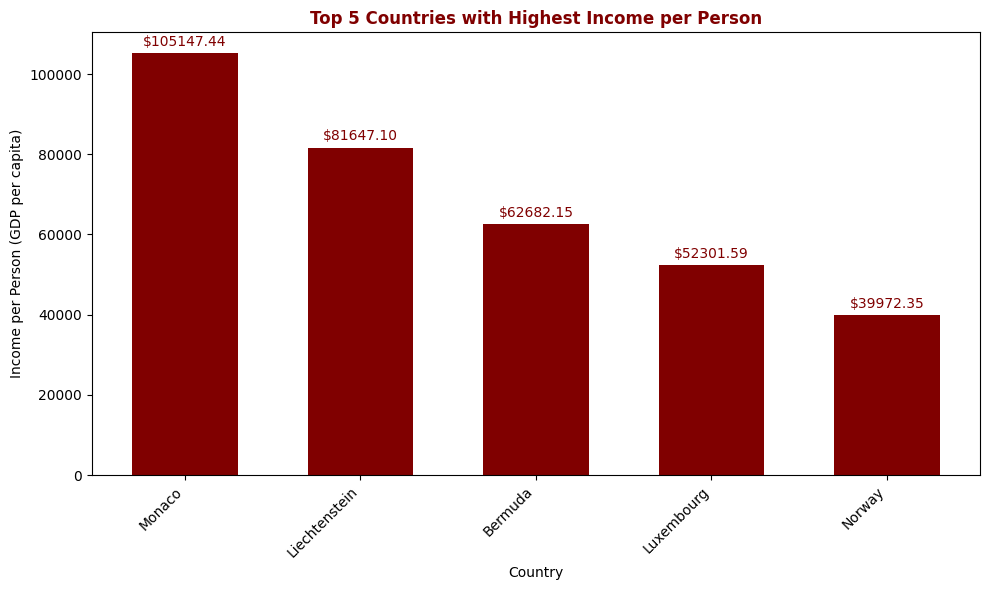

In [69]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)

# Create a new figure for the first plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph for the highest income countries
bars_high_income = axes.bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                            color='#800000', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Income per Person (GDP per capita)')
axes.set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
axes.set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()
    axes.annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the first plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/4099530543.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



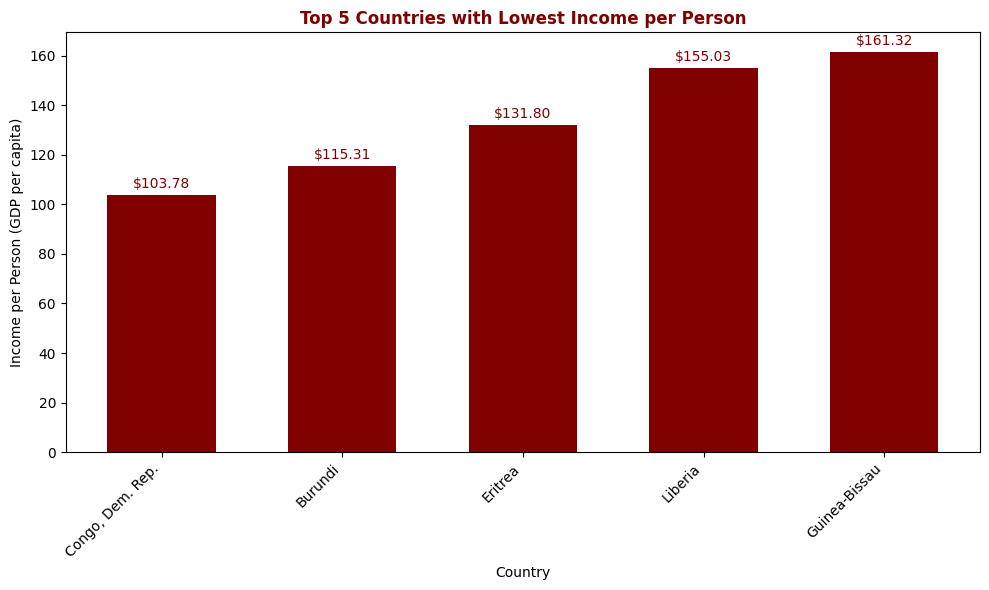

In [70]:
# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)

# Create a new figure for the second plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph for the lowest income countries
bars_low_income = axes.bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                           color='#800000', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Income per Person (GDP per capita)')
axes.set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
axes.set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()
    axes.annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the second plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/181518017.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



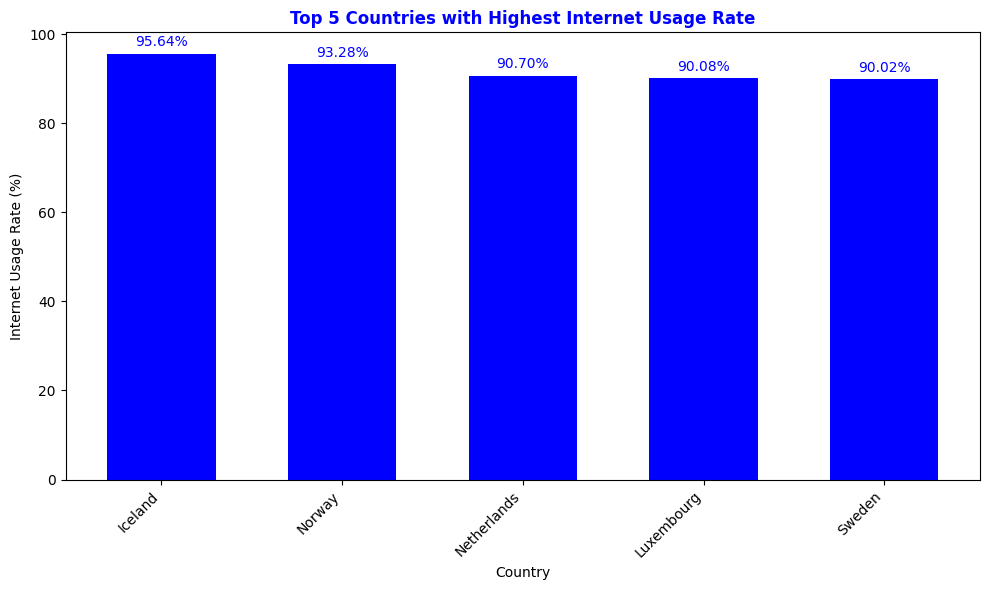

In [71]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph
bars_high_internet = axes.bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                              color='blue', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Internet Usage Rate (%)')
axes.set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
axes.set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar
for bar in bars_high_internet:
    height = bar.get_height()
    axes.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/1114707806.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



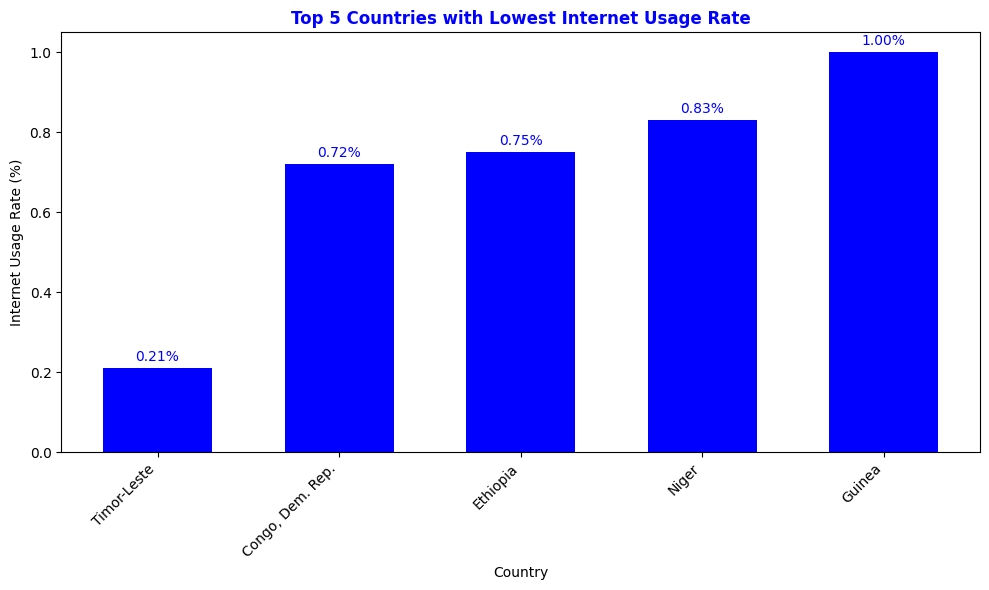

In [72]:
# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)

# Create a new figure for the second plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph
bars_low_internet = axes.bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                             color='blue', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Internet Usage Rate (%)')
axes.set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
axes.set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar
for bar in bars_low_internet:
    height = bar.get_height()
    axes.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


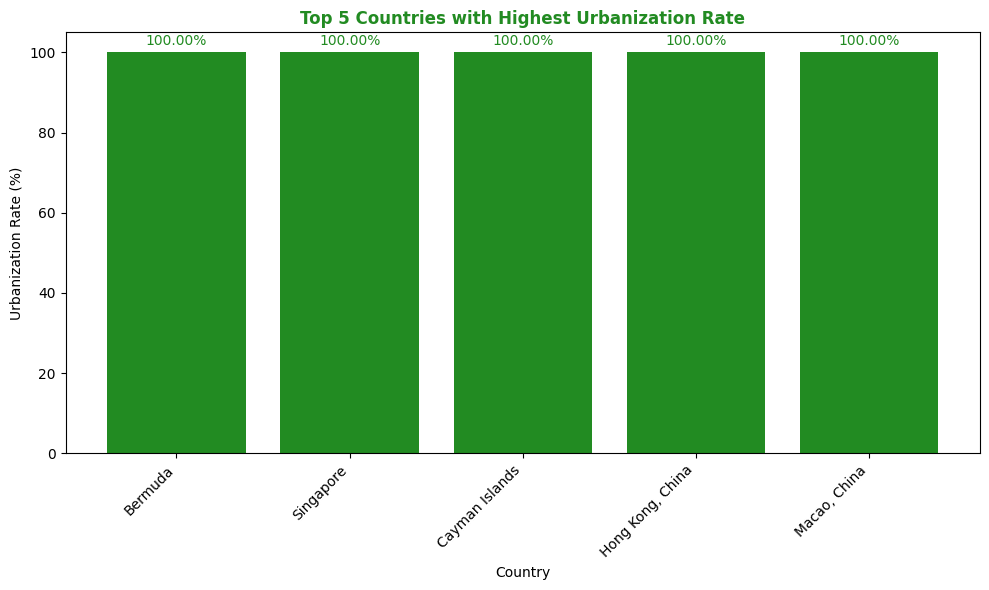

In [73]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)

# Plotting the Top 5 Countries with Highest Urbanization Rate
plt.figure(figsize=(10, 6))

bars_high_urban = plt.bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'], color='#228B22')

plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')
plt.title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
plt.xticks(rotation=45, ha='right')

for bar in bars_high_urban:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', color='#228B22')

plt.tight_layout()
plt.show()


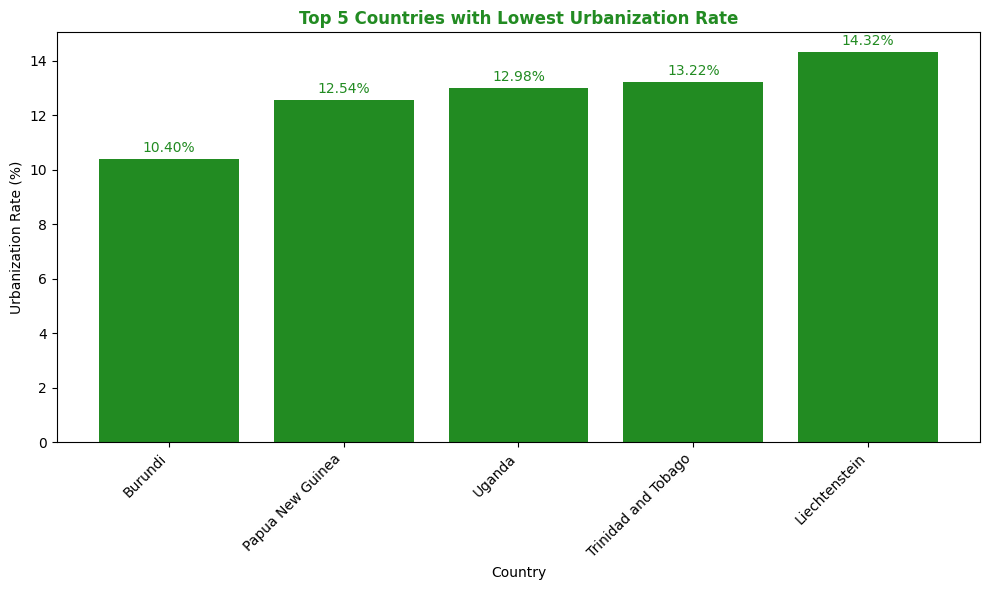

In [74]:
# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)

# Plotting the Top 5 Countries with Lowest Urbanization Rate
plt.figure(figsize=(10, 6))

bars_low_urban = plt.bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'], color='#228B22')

plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')
plt.title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
plt.xticks(rotation=45, ha='right')

for bar in bars_low_urban:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', color='#228B22')

plt.tight_layout()
plt.show()


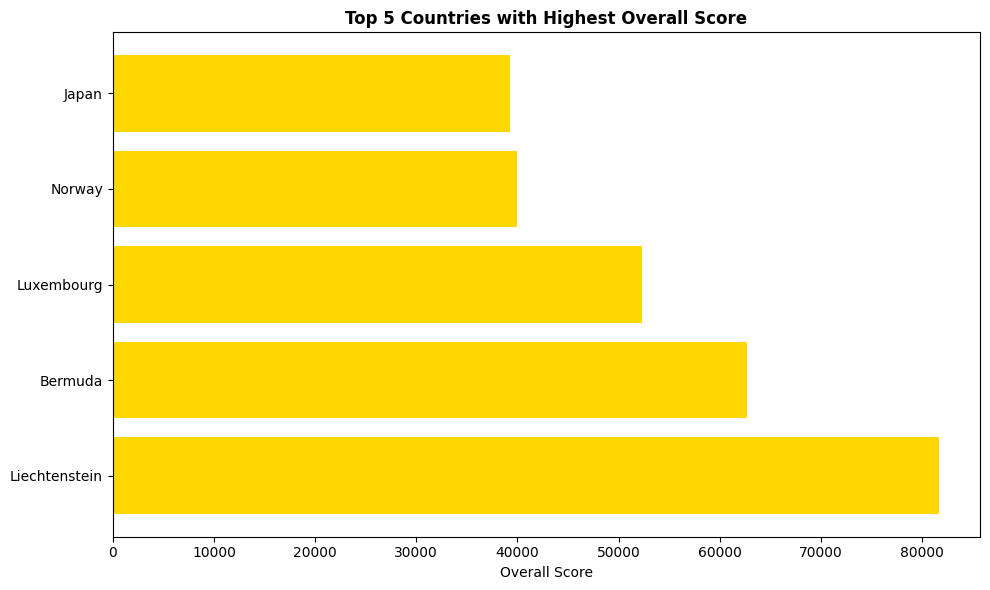

In [75]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Drop rows with missing data in specified columns
cols_to_check = ['incomeperperson', 'internetuserate', 'urbanrate']
df = df.dropna(subset=cols_to_check)

# Calculate the overall score for each country
df['Overall_Score'] = df[cols_to_check].max(axis=1)

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)

# Plotting the Top 5 Countries with Highest Overall Score
plt.figure(figsize=(10, 6))

bars_high_score = plt.barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'], color='#FFD700')

plt.xlabel('Overall Score')
plt.title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


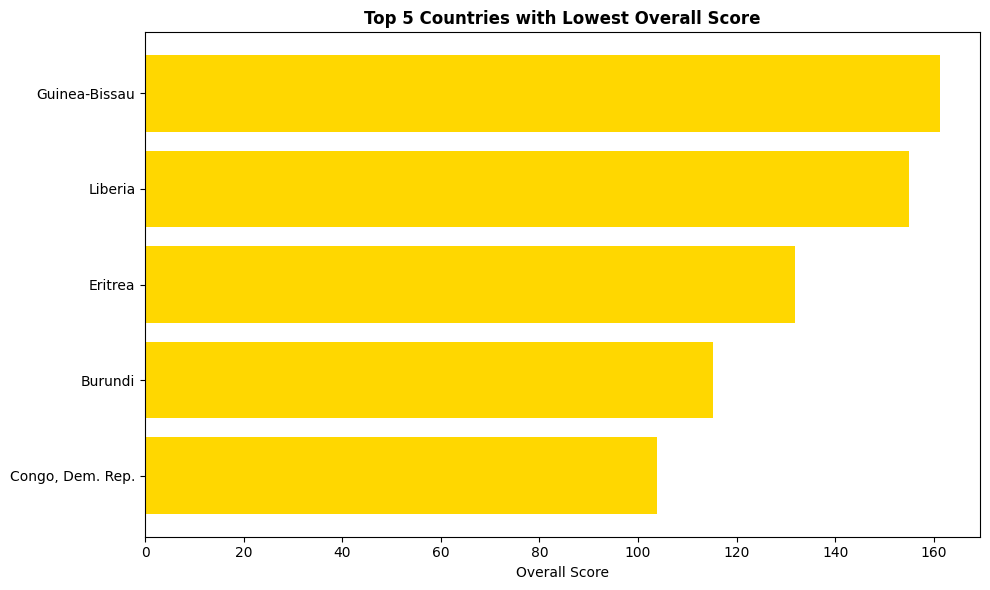

In [76]:
# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)

# Plotting the Top 5 Countries with Lowest Overall Score
plt.figure(figsize=(10, 6))

bars_low_score = plt.barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'], color='#FFD700')

plt.xlabel('Overall Score')
plt.title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/2464648112.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/2464648112.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/2464648112.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



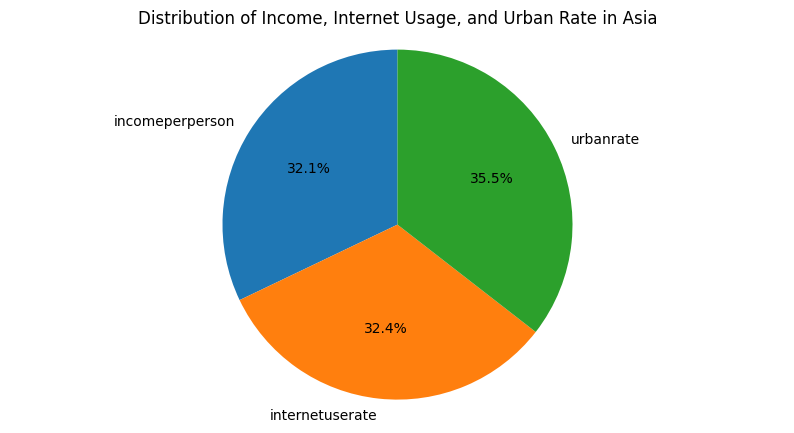

In [77]:
# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('gapminder_internet.csv')

# Define the function to normalize a column
def normalize_column(col, avg_val):
    return col / avg_val

# Calculate overall averages for normalization
overall_avg_income = data['incomeperperson'].mean()
overall_avg_internet = data['internetuserate'].mean()
overall_avg_urban = data['urbanrate'].mean()

# Filter data for the 'Asia' continent
asia_data = data[data['continent'] == 'Asia']

# Normalize the data for 'Asia' using the defined normalization function
asia_data['incomeperperson'] = normalize_column(asia_data['incomeperperson'], overall_avg_income)
asia_data['internetuserate'] = normalize_column(asia_data['internetuserate'], overall_avg_internet)
asia_data['urbanrate'] = normalize_column(asia_data['urbanrate'], overall_avg_urban)

# Define the variables for which we want to compute mean values
variables = ['incomeperperson', 'internetuserate', 'urbanrate']

# Compute mean values for the normalized variables in 'Asia'
asia_mean_values = asia_data[variables].mean()

# Create the pie chart for 'Asia'
fig, ax = plt.subplots()
ax.pie(asia_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title for the pie chart
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Asia")

# Display the pie chart
plt.show()


/tmp/ipykernel_21273/2333048908.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/2333048908.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/2333048908.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



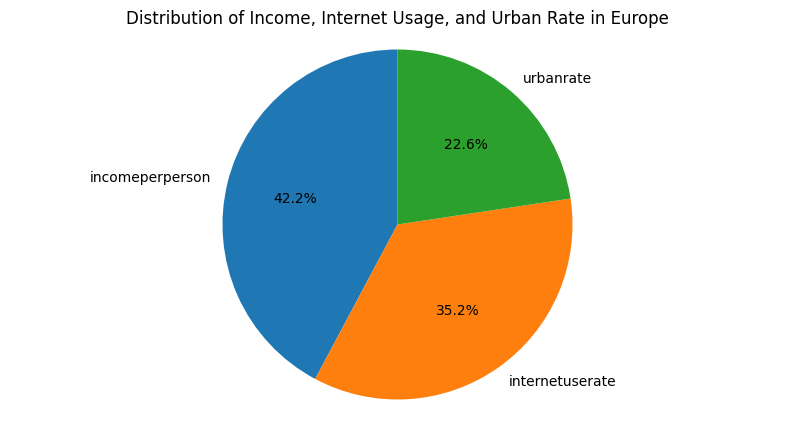

In [78]:
# Filter data for Europe
europe_data = data[data['continent'] == 'Europe']

# Normalize the data for Europe
europe_data['incomeperperson'] = normalize_column(europe_data['incomeperperson'], overall_avg_income)
europe_data['internetuserate'] = normalize_column(europe_data['internetuserate'], overall_avg_internet)
europe_data['urbanrate'] = normalize_column(europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Europe
europe_mean_values = europe_data[variables].mean()

# Create the pie chart for Europe
fig, ax = plt.subplots()
ax.pie(europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Europe")
plt.show()


/tmp/ipykernel_21273/1283620628.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/1283620628.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/1283620628.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



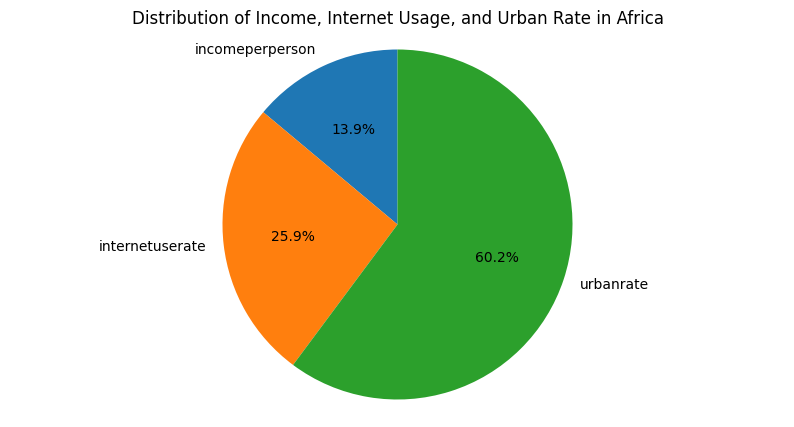

In [79]:
# ... (import statements and data reading)

# Filter data for Africa
europe_data = data[data['continent'] == 'Africa']

# Normalize the data for Africa
europe_data['incomeperperson'] = normalize_column(europe_data['incomeperperson'], overall_avg_income)
europe_data['internetuserate'] = normalize_column(europe_data['internetuserate'], overall_avg_internet)
europe_data['urbanrate'] = normalize_column(europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Africa
europe_mean_values = europe_data[variables].mean()

# Create the pie chart for Africa
fig, ax = plt.subplots()
ax.pie(europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Africa")
plt.show()


/tmp/ipykernel_21273/3869701078.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/3869701078.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/3869701078.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



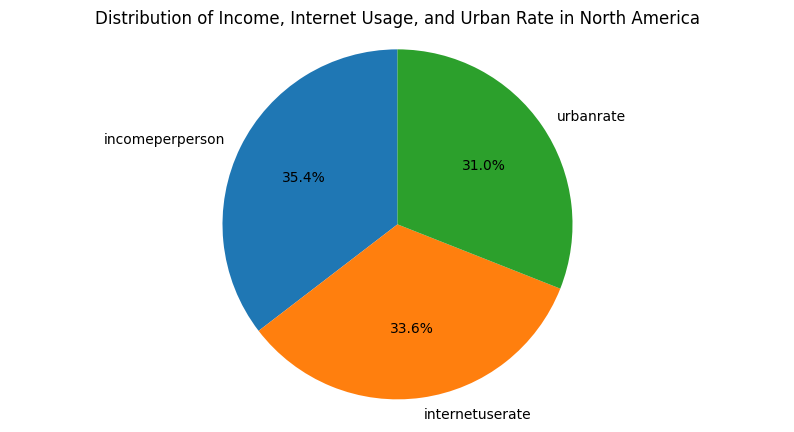

In [80]:
# Filter data for North America
north_america_data = data[data['continent'] == 'North America']

# Normalize the data for North America
north_america_data['incomeperperson'] = normalize_column(north_america_data['incomeperperson'], overall_avg_income)
north_america_data['internetuserate'] = normalize_column(north_america_data['internetuserate'], overall_avg_internet)
north_america_data['urbanrate'] = normalize_column(north_america_data['urbanrate'], overall_avg_urban)

# Compute mean values for North America
north_america_mean_values = north_america_data[variables].mean()

# Create the pie chart for North America
fig, ax = plt.subplots()
ax.pie(north_america_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in North America")
plt.show()


/tmp/ipykernel_21273/2074026355.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/2074026355.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/2074026355.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



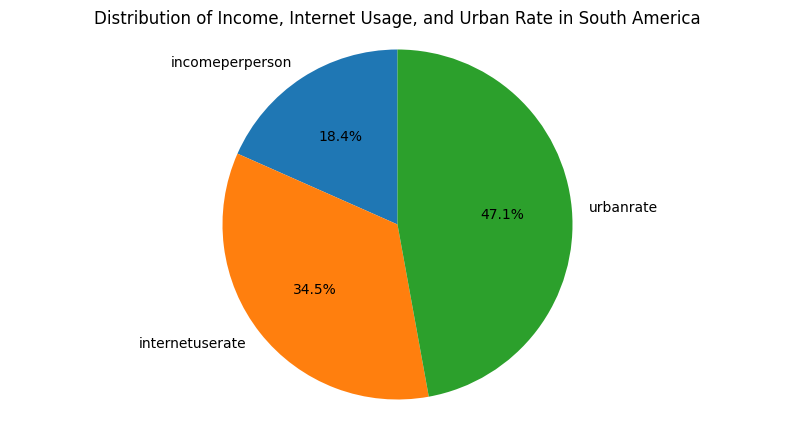

In [81]:
# Filter data for South America
south_america_data = data[data['continent'] == 'South America']

# Normalize the data for South America
south_america_data['incomeperperson'] = normalize_column(south_america_data['incomeperperson'], overall_avg_income)
south_america_data['internetuserate'] = normalize_column(south_america_data['internetuserate'], overall_avg_internet)
south_america_data['urbanrate'] = normalize_column(south_america_data['urbanrate'], overall_avg_urban)

# Compute mean values for South America
south_america_mean_values = south_america_data[variables].mean()

# Create the pie chart for South America
fig, ax = plt.subplots()
ax.pie(south_america_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in South America")
plt.show()


/tmp/ipykernel_21273/891605182.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/891605182.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/891605182.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



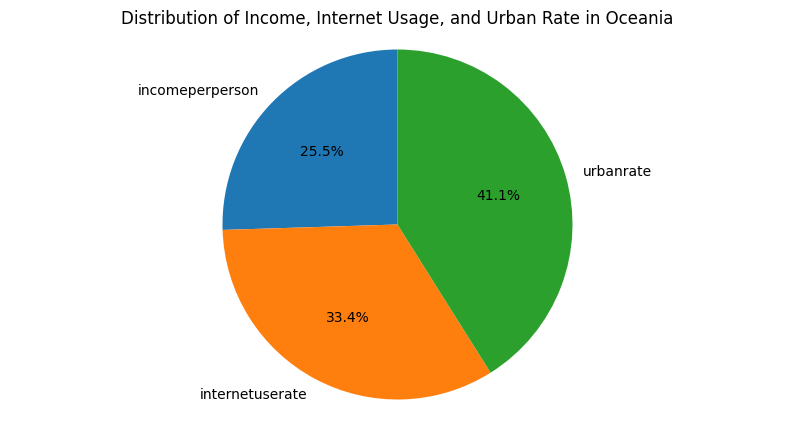

In [82]:
# Filter data for Oceania
oceania_data = data[data['continent'] == 'Oceania']

# Normalize the data for Oceania
oceania_data['incomeperperson'] = normalize_column(oceania_data['incomeperperson'], overall_avg_income)
oceania_data['internetuserate'] = normalize_column(oceania_data['internetuserate'], overall_avg_internet)
oceania_data['urbanrate'] = normalize_column(oceania_data['urbanrate'], overall_avg_urban)

# Compute mean values for Oceania
oceania_mean_values = oceania_data[variables].mean()

# Create the pie chart for Oceania
fig, ax = plt.subplots()
ax.pie(oceania_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Oceania")
plt.show()


/tmp/ipykernel_21273/115888529.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/115888529.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/115888529.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



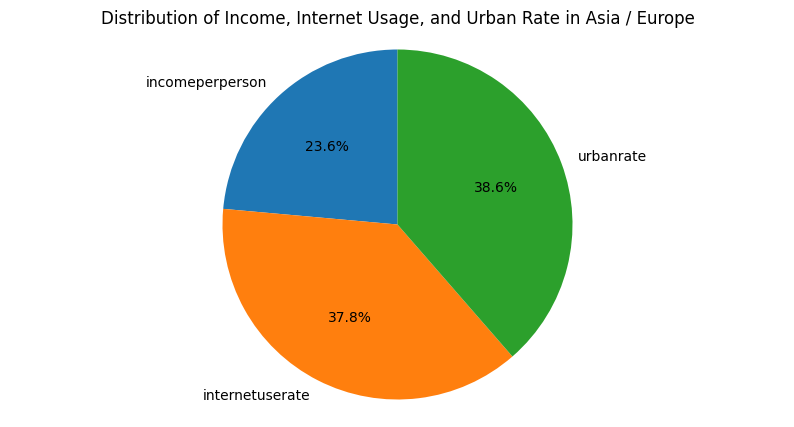

In [83]:
# Filter data for Asia / Europe
asia_europe_data = data[data['continent'] == 'Asia / Europe']

# Normalize the data for Asia / Europe
asia_europe_data['incomeperperson'] = normalize_column(asia_europe_data['incomeperperson'], overall_avg_income)
asia_europe_data['internetuserate'] = normalize_column(asia_europe_data['internetuserate'], overall_avg_internet)
asia_europe_data['urbanrate'] = normalize_column(asia_europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Asia / Europe
asia_europe_mean_values = asia_europe_data[variables].mean()

# Create the pie chart for Asia / Europe
fig, ax = plt.subplots()
ax.pie(asia_europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Asia / Europe")
plt.show()


# Year 2020 values

In [84]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Function to create the map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    fig = go.Figure()

    trace = go.Choropleth(
        locations=data['country'],
        locationmode='country names',
        z=z_data,
        text=data['country'],
        hovertemplate="<b>%{text}</b><br><br>" +
                    title + ": %{z:.2f}<extra></extra>",
        colorscale=colorscale,
        reversescale=reversescale,  # Set reversescale to True for income data
        colorbar=dict(title=colorbar_title),
        marker_line_color='darkgray',
        marker_line_width=0.5
    )

    fig.add_trace(trace)

    fig.update_geos(
        visible=False,
        showcountries=True,
        showcoastlines=True,
        projection_type="mercator"
    )

    fig.update_layout(
        title=title,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="mercator"
        ),
        annotations=[
            dict(
                x=0.5,
                y=-0.1,
                xref='paper',
                yref='paper',
                text='Search a country:',
                showarrow=False,
                font=dict(size=14)
            )
        ],
        margin=dict(l=0, r=0, t=30, b=0),  # Adjust the margins
        width=1200,  # Adjust the width of the map box
        height=900  # Adjust the height of the map box
    )

    return fig

# Create a custom color scale with values from 20k to the lowest value fading to white
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],  # White for the lowest values
    [0.2, 'rgb(255, 230, 230)'],
    [0.4, 'rgb(255, 179, 179)'],
    [0.6, 'rgb(255, 128, 128)'],
    [0.8, 'rgb(255, 77, 77)'],
    [1.0, 'rgb(153, 0, 0)']
]

# Define the 'data' dictionary containing the necessary columns
data = {
    'country': df['country'],
    'incomeperperson': df['incomeperperson'],
    'internetuserate': df['internetuserate'],
    'urbanrate': df['urbanrate']
}

# Create the first world map for income per person with the custom color scale and the color scale reversed
fig1 = create_map_figure(
    z_data=data['incomeperperson'].clip(upper=100000),
    colorscale=red_scale,
    title="Income per Person",
    colorbar_title="Income per Person",
    reversescale=False  # Set reversescale to True for income data
)

# Create the second world map for internet usage rate
fig2 = create_map_figure(
    z_data=data['internetuserate'],
    colorscale='Blues',
    title="Internet Usage Rate",
    colorbar_title="Internet Usage Rate"
)

# Create the third world map for urban rate
fig3 = create_map_figure(
    z_data=data['urbanrate'],
    colorscale='Greens',
    title="Urban Rate",
    colorbar_title="Urban Rate"
)

# Display the maps side by side
display(fig1)
display(fig2)
display(fig3)


/tmp/ipykernel_21273/1102086988.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21273/1102086988.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



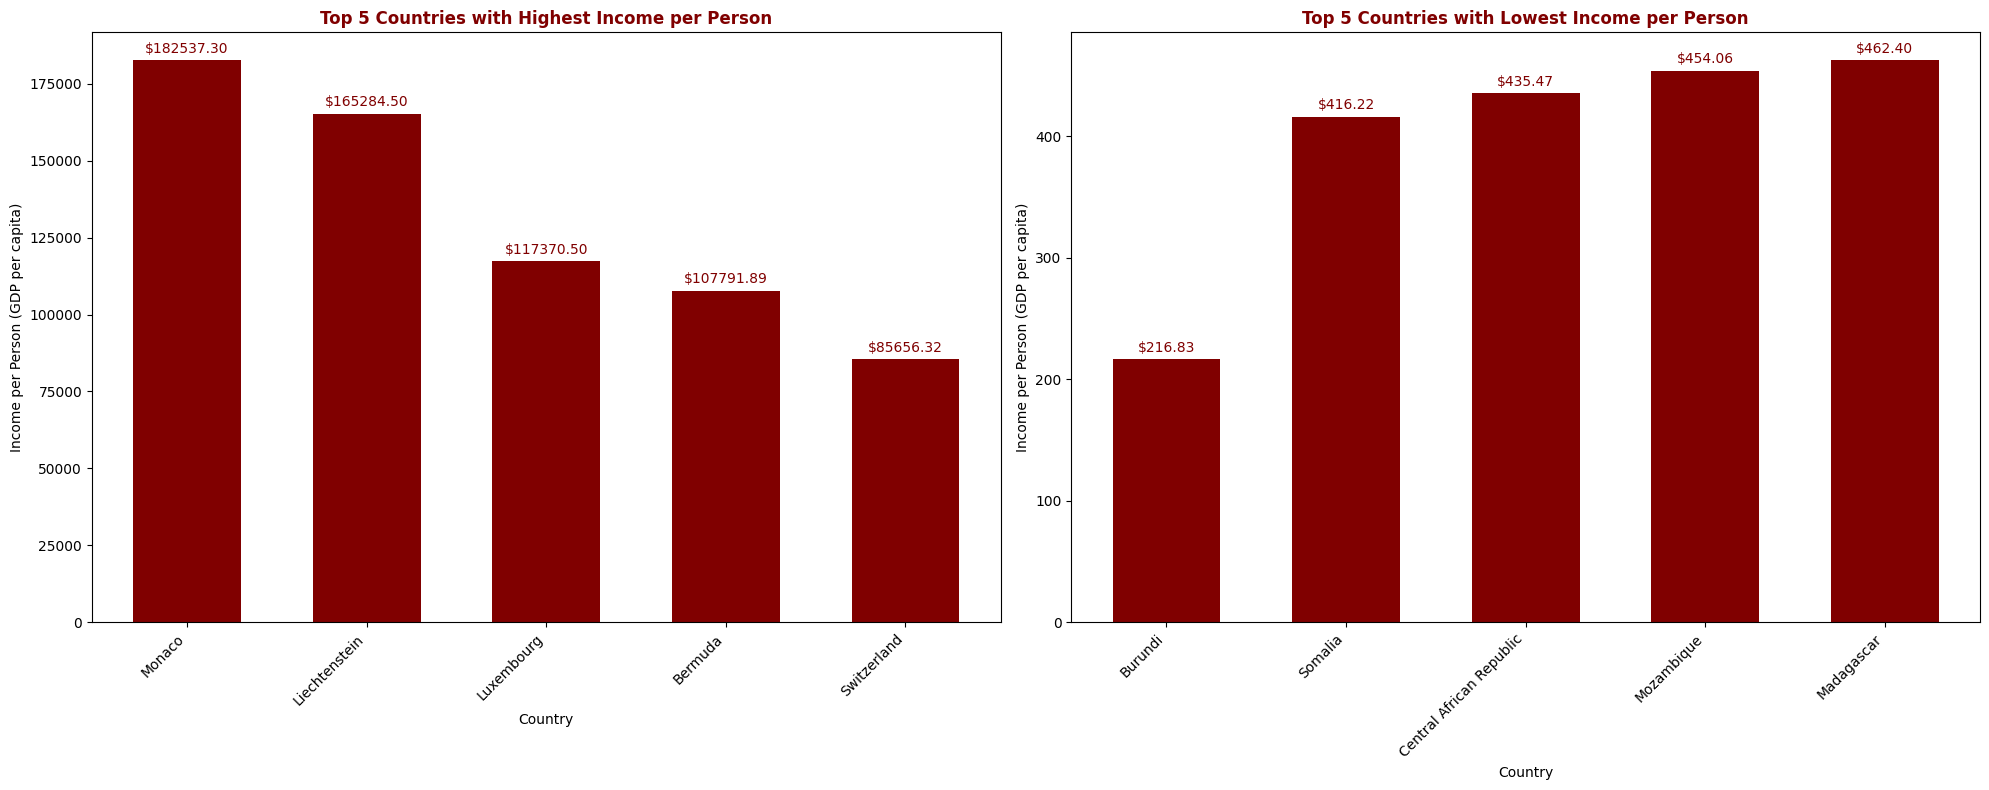

In [85]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)

# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Income per Person)
bars_high_income = axes[0].bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                            color='#800000', width=0.6)  # Increase the width for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Income per Person (GDP per capita)')
axes[0].set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
axes[0].set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()
    axes[0].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Plot the second bar graph (Top 5 Countries with Lowest Income per Person)
bars_low_income = axes[1].bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                            color='#800000', width=0.6)  # Increase the width for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Income per Person (GDP per capita)')
axes[1].set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
axes[1].set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()
    axes[1].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/1500109702.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21273/1500109702.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



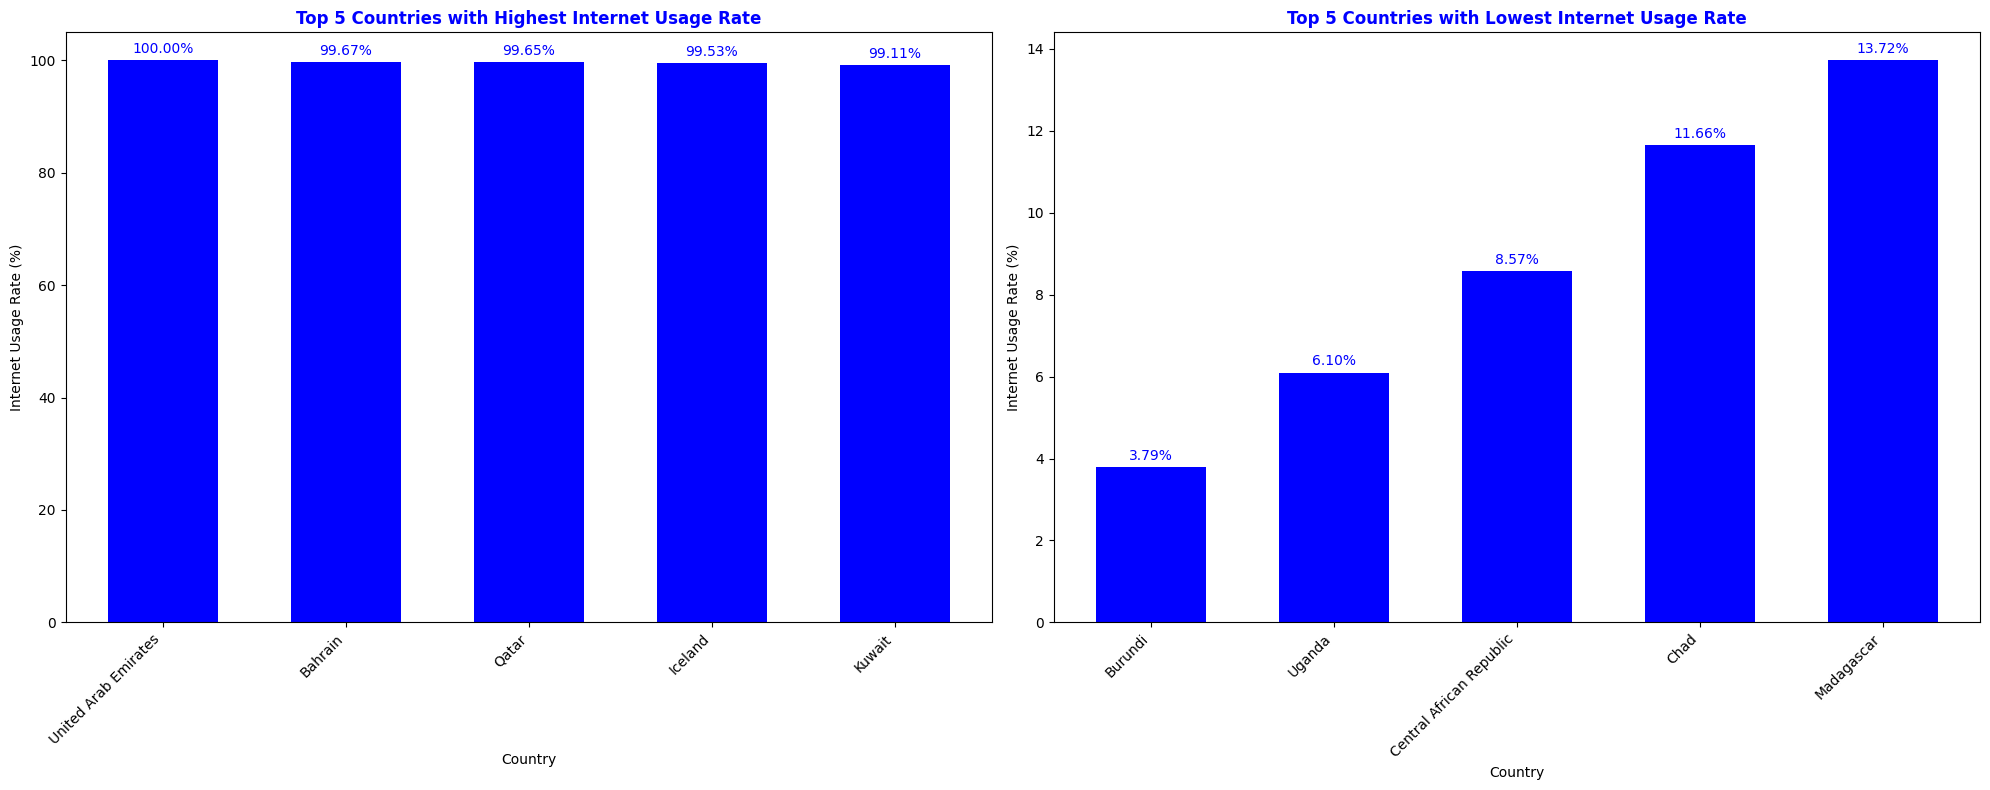

In [86]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)

# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Internet Usage Rate)
bars_high_internet = axes[0].bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                                color='blue', width=0.6)

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Internet Usage Rate (%)')
axes[0].set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
axes[0].set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_internet:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Plot the second bar graph (Top 5 Countries with Lowest Internet Usage Rate)
bars_low_internet = axes[1].bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                            color='blue', width=0.6)

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Internet Usage Rate (%)')
axes[1].set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
axes[1].set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_internet:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/1211446994.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21273/1211446994.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



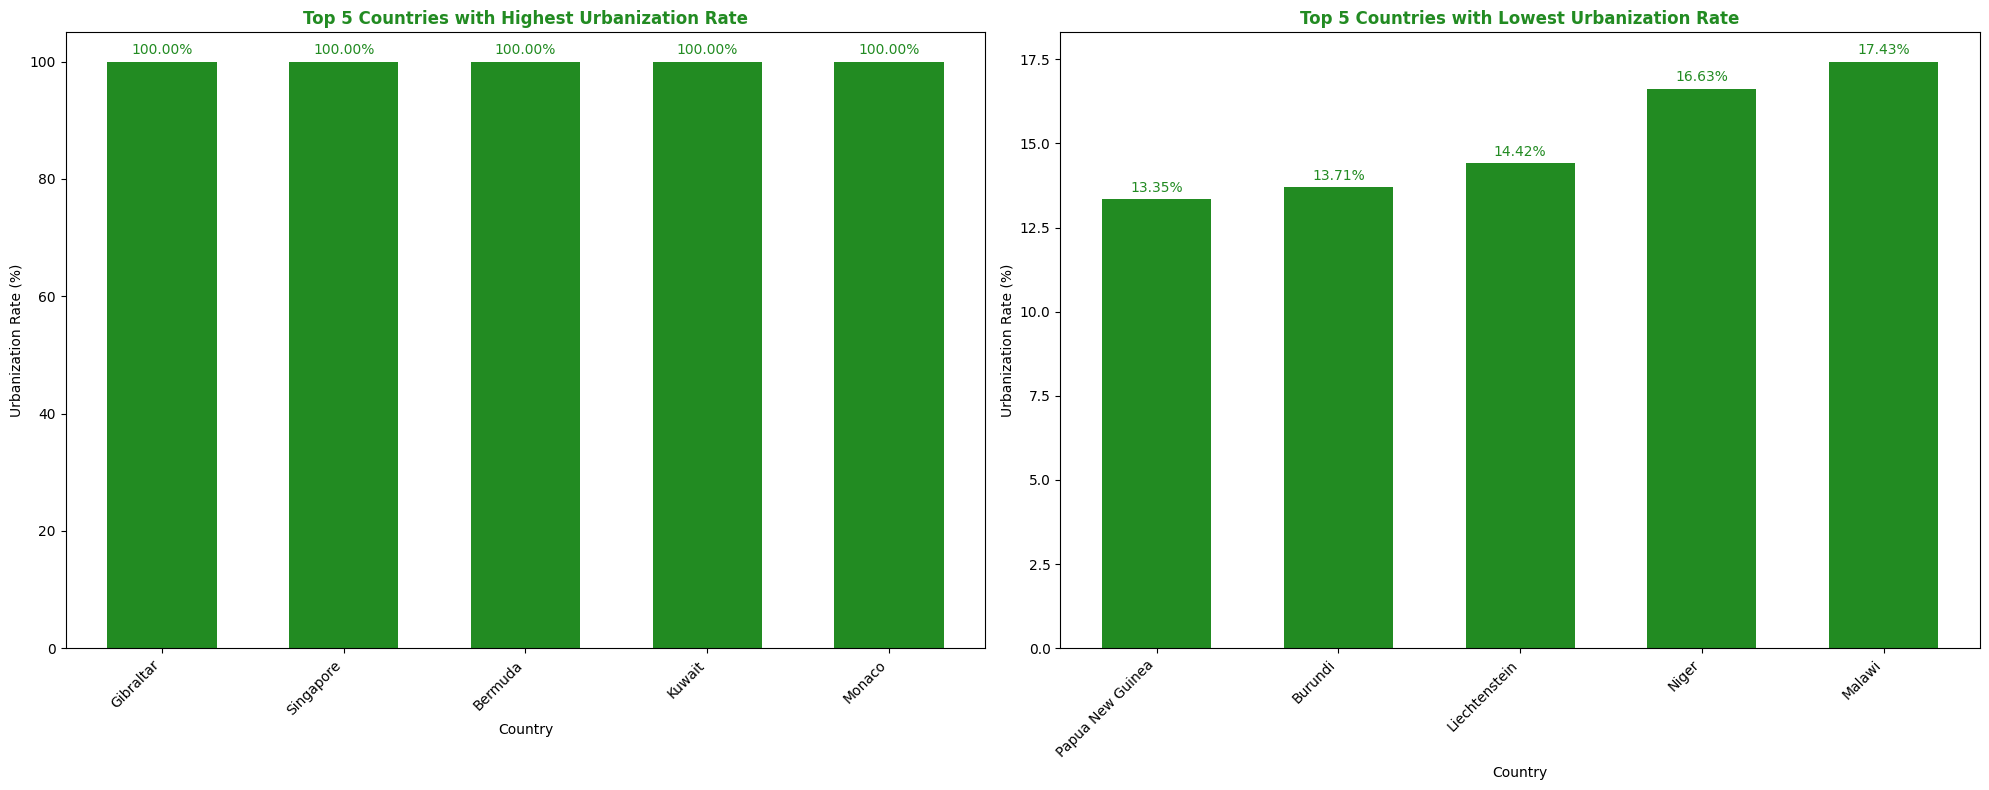

In [87]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)

# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Urbanization Rate)
bars_high_urban = axes[0].bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Urbanization Rate (%)')
axes[0].set_title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
axes[0].set_xticklabels(sorted_df_high_urban['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_urban:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')

# Plot the second bar graph (Top 5 Countries with Lowest Urbanization Rate)
bars_low_urban = axes[1].bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Urbanization Rate (%)')
axes[1].set_title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
axes[1].set_xticklabels(sorted_df_low_urban['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_urban:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


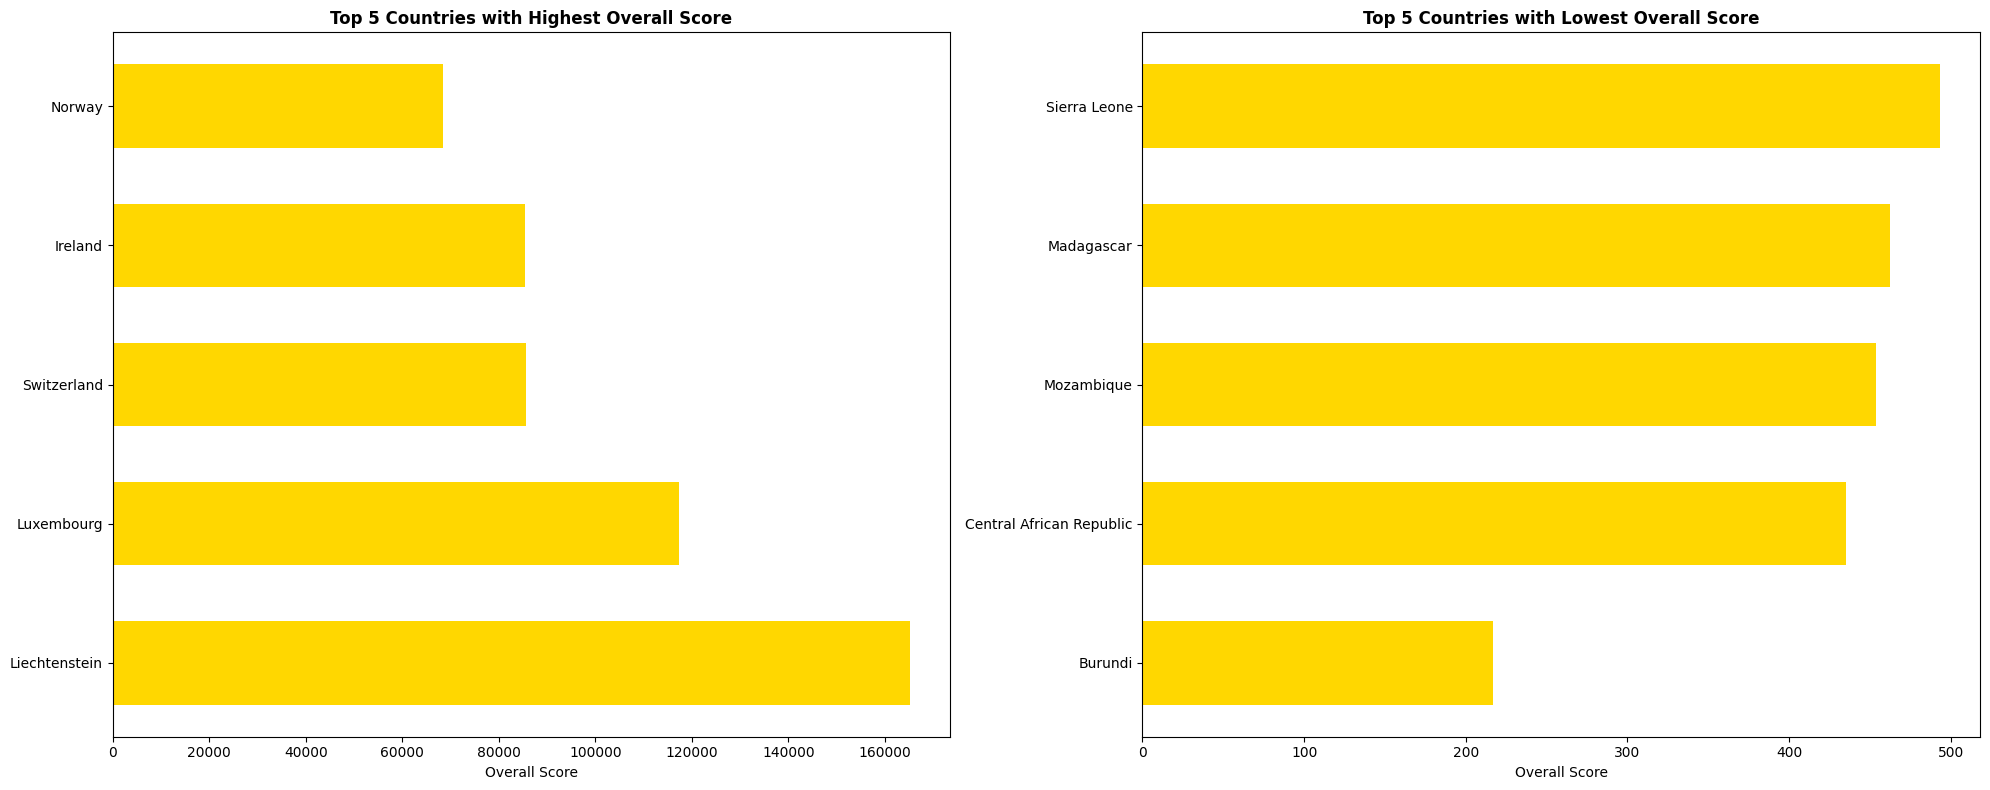

In [88]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Drop rows with missing data in specified columns
cols_to_check = ['incomeperperson', 'internetuserate', 'urbanrate']
df = df.dropna(subset=cols_to_check)

# Calculate the overall score for each country
df['Overall_Score'] = df[cols_to_check].max(axis=1)

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)

# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Overall Score)
bars_high_score = axes[0].barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'],
                                color='#FFD700', height=0.6)  # Darker Yellow color

# Add labels and title to the first plot
axes[0].set_xlabel('Overall Score')
axes[0].set_title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')

# Plot the second bar graph (Top 5 Countries with Lowest Overall Score)
bars_low_score = axes[1].barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'],
                            color='#FFD700', height=0.6)  # Darker Yellow color

# Add labels and title to the second plot
axes[1].set_xlabel('Overall Score')
axes[1].set_title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


/tmp/ipykernel_21273/3255747431.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/3255747431.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21273/3255747431.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

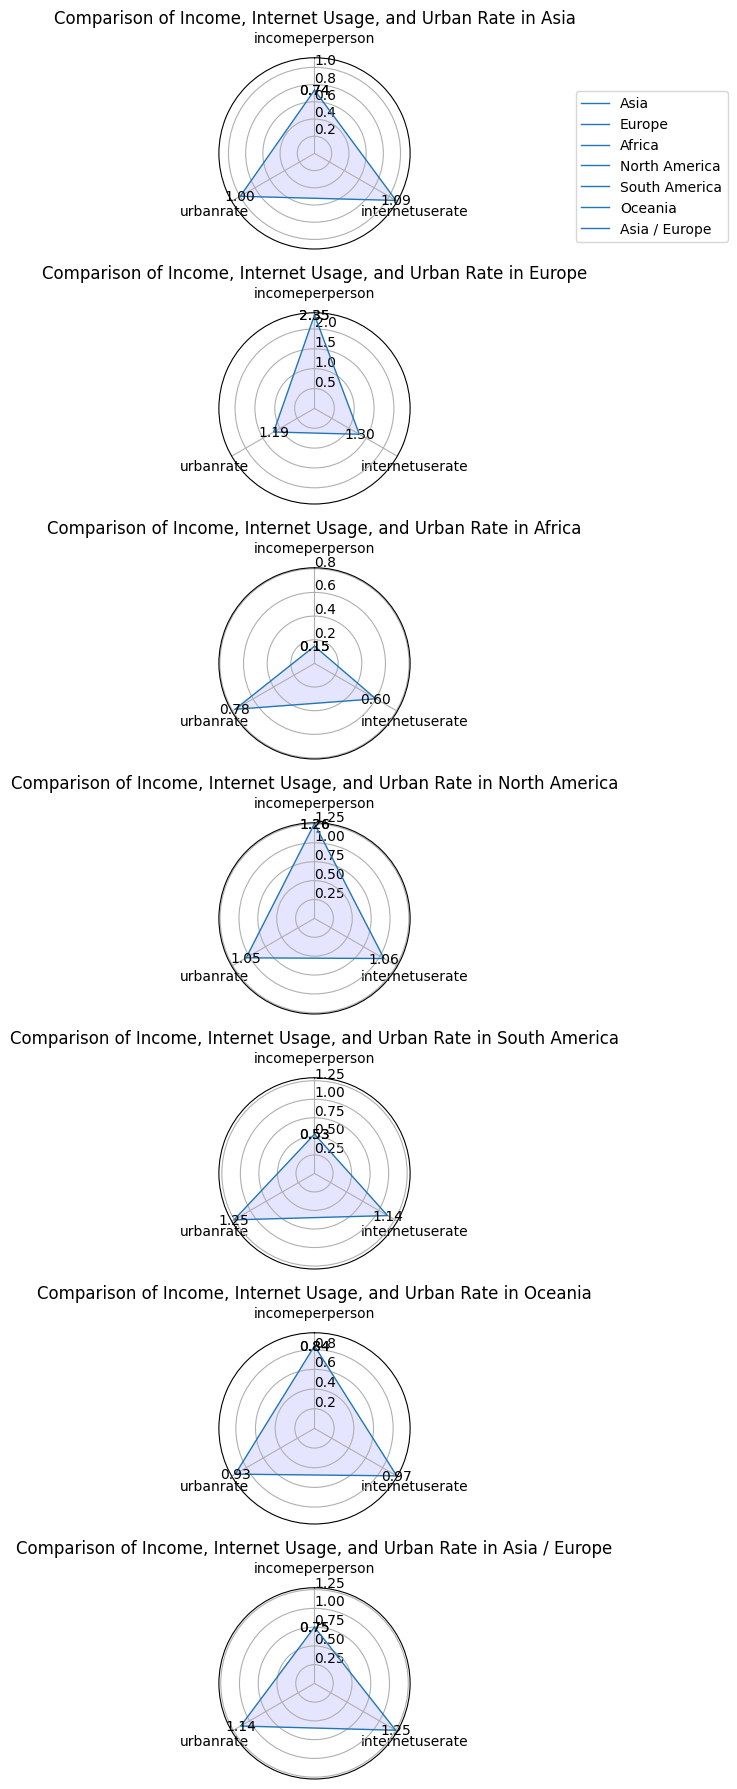

In [89]:
# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('2020dataset.csv')

# Calculate overall averages for normalization
overall_avg_income = data['incomeperperson'].mean()
overall_avg_internet = data['internetuserate'].mean()
overall_avg_urban = data['urbanrate'].mean()

# Create subplots for each continent's radar chart
fig, axs = plt.subplots(len(['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia / Europe']), 1, figsize=(10, 18), subplot_kw=dict(polar=True))

# Loop through each continent, filter data, normalize variables, and plot radar chart
continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia / Europe']
for idx, continent in enumerate(continents):
    continent_data = data[data['continent'] == continent]
    
    # Normalize the data for each variable based on overall averages
    def normalize_column(col, avg_val):
        return col / avg_val
    
    continent_data['incomeperperson'] = normalize_column(continent_data['incomeperperson'], overall_avg_income)
    continent_data['internetuserate'] = normalize_column(continent_data['internetuserate'], overall_avg_internet)
    continent_data['urbanrate'] = normalize_column(continent_data['urbanrate'], overall_avg_urban)

    # Compute the mean values for each variable in the continent
    variables = ['incomeperperson', 'internetuserate', 'urbanrate']
    mean_values = continent_data[variables].mean()

    # Number of variables
    num_variables = len(variables)

    # Create an array of angles for the radar chart
    angles = [n / float(num_variables) * 2 * 3.14159 for n in range(num_variables)]
    angles += angles[:1]

    # Create the radar plot for the current continent
    ax = axs[idx]
    ax.set_theta_offset(3.14159 / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_rlabel_position(0)

    # Plot the data for the current continent
    values = mean_values.values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=continent)
    ax.fill(angles, values, 'b', alpha=0.1)

    # Display values next to each axis
    for angle, value in zip(angles, values):
        ax.text(angle, value, f'{value:.2f}', ha='center', va='center')

    # Add title for each continent's radar chart
    ax.set_title(f"Comparison of Income, Internet Usage, and Urban Rate in {continent}")

# Add a common legend to the subplots
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
